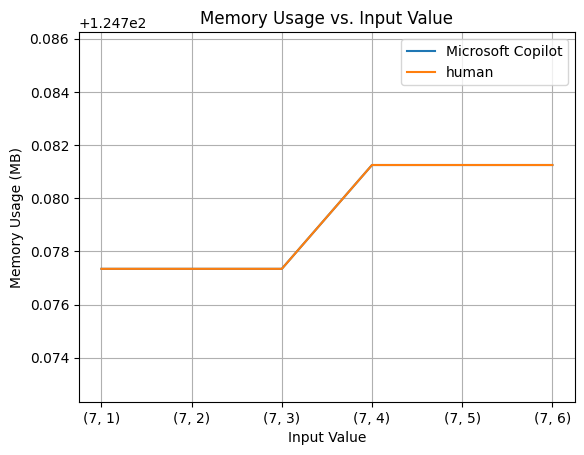

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from memory_profiler import memory_usage
import random

def create_table1(n, m):
    """
    Create a table with dimensions n and m.
    
    Parameters:
    n (int): Number of rows.
    m (int): Number of columns.

    Returns:
    list[list]: A table of size n x m.
    """
    if n <= 1 or m <= 1:
        return [[1 for _ in range(m)] for _ in range(n)]
    else:
        table = create_table1(n - 1, m)
        new_row = [1]
        for i in range(1, m):
            new_row.append(new_row[i - 1] + table[-1][i])
        table.append(new_row)
        return table

def create_table2(n: int, m: int) -> list[list]:
    '''
    returns list with fibonacci numbers.

    >>> create_table(4, 6) 
    [[1, 1, 1, 1, 1, 1], [1, 2, 3, 4, 5, 6], [1, 3, 6, 10, 15, 21], [1, 4, 10, 20, 35, 56]]
    '''
    if n > 1 and m > 1:
        for i, _ in enumerate(range(m)):
            if i > 0:
                table[0] += [table[0][i - 1] + create_table2(n-1, m)[-1][i]]
            else:
                table = [[1]]
        return create_table2(n-1, m) + table
    if n <= 1 or m <= 1:
        return [[1 for _ in range(m)] for _ in range(n)]


def memory_test():

    # Memory usage container for each input value
    mem_usages_1 = []
    mem_usages_2 = []
    n = 7
    test_sizes = []
    # Measure memory usage for each input value
    for m in range(1, 7):
        test_sizes.append(str((n, m,)))
        mem_usage = memory_usage((create_table1, (n, m,), {}))
        mem_usages_1.append(mem_usage[-1])  # Take the maximum memory usage from the list
        mem_usage = memory_usage((create_table2, (n, m,), {}))
        mem_usages_2.append(mem_usage[-1])  # Take the maximum memory usage from the list

    # Plot the results
    plt.plot(test_sizes, mem_usages_1, label = 'Microsoft Copilot')
    plt.plot(test_sizes, mem_usages_2, label = 'human')
    plt.title('Memory Usage vs. Input Value')
    plt.xlabel('Input Value')
    plt.ylabel('Memory Usage (MB)')
    plt.ylim(min(mem_usages_1+mem_usages_2) - 0.005, max(mem_usages_1+mem_usages_2) + 0.005)
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == '__main__':    
    memory_test()